 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# Rading the whale returs dataset using the pandas built in function read_csv and converting the Date column into datetime format.
df = pd.read_csv('Resources/whale_returns.csv',index_col="Date", parse_dates=True, infer_datetime_format=True)
df.sort_index(axis=0)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
# Checking the null values and counting them using pandas built in function sum.
df.isnull().sum().sum()

4

In [4]:
# Drop nulls
# Droping the row which contain null values using pandas build in function dropna.
df.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
# Rading the algorithmic returns dataset using the pandas built in function read_csv and converting the Date column into datetime format.
df_algo = pd.read_csv('Resources/algo_returns.csv',index_col="Date", parse_dates=True, infer_datetime_format=True)
df_algo.sort_index(axis=0)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
# Checking the null values and counting them using pandas built in function sum.
df_algo.isnull().sum().sum()

6

In [7]:
# Drop nulls
# Droping the row which contain null values using pandas build in function dropna.
df_algo.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
# Rading the S&P 500 Closing Prices dataset using the pandas built in function read_csv and converting the Date column into datetime format
df_SP = pd.read_csv('Resources/sp500_history.csv',index_col="Date", parse_dates=True, infer_datetime_format=True)
df_SP['Close'] = df_SP['Close']
df_SP.sort_index(axis=0)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
# Checking the data type of the specific column using the dtype.
data_type=df_SP['Close'].dtype

In [10]:
# Fix Data Types
# Removing the special character from the Close column and converting it into float.
df_SP['Close'] = df_SP['Close'].str.replace(r'\D','').astype(float)

C:\Users\NADIRQ~1\AppData\Local\Temp/ipykernel_29832/2347527777.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_SP['Close'] = df_SP['Close'].str.replace(r'\D','').astype(float)


In [11]:
# Calculate Daily Returns
# Calculating the daily returns using the pct_change function.
df_SP['Close']  = df_SP['Close'].pct_change()

In [12]:
# Drop nulls
# Droping the row which contain null values using pandas build in function dropna.
df_SP.dropna(inplace=True)


In [13]:
# Rename `Close` Column to be specific to this portfolio.
# Renaming the specific column using raname function.
df_SP.rename(columns={'Close': 'S&P 500'},inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Using the concat function to combine the DataFrames by column and performing an inner join. 
protfoliosreturns = pd.concat([df,df_algo,df_SP],axis="columns", join="inner")
protfoliosreturns.head(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns of all portfolios'}, xlabel='Date'>

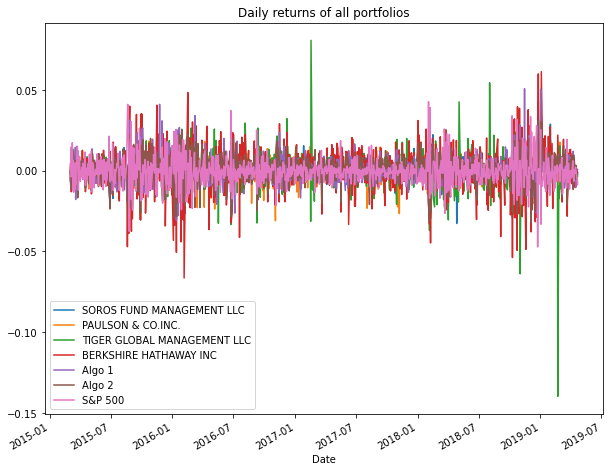

In [15]:
# Plot daily returns of all portfolios
# Ploting the daily returns using the built in plot function,figure size and title.
protfoliosreturns.plot(figsize=(10,8),title=("Daily returns of all portfolios"))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns all portfolios'}, xlabel='Date'>

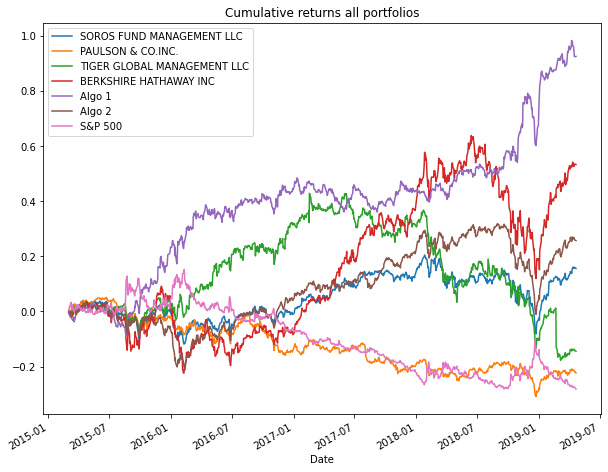

In [176]:
# Calculate cumulative returns of all portfolios
# Using the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end.
cumulative_returns = (1 + protfoliosreturns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,8),title="Cumulative returns all portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Box plot for each portfolio')

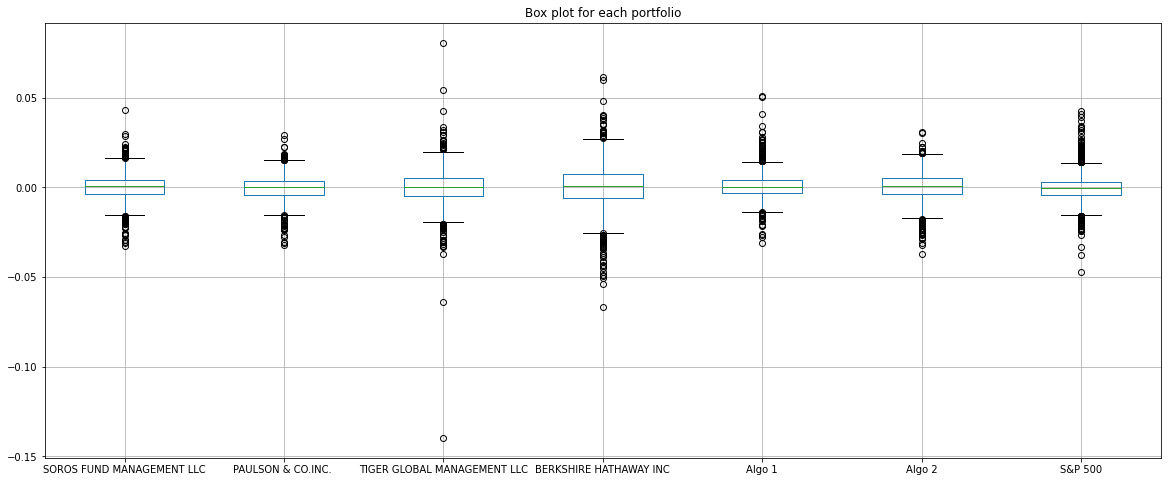

In [177]:
# Box plot to visually show risk
# Creating the box plot for each portfolio using built in function boxplot and passing fixgure size as argument.
boxplot=protfoliosreturns.boxplot(figsize=(20,8))
boxplot.set_title("Box plot for each portfolio")

### Calculate Standard Deviations

In [178]:
# Calculate the daily standard deviations of all portfolios
# Calculating the daily standard deviation of all portfolios using the pandas build in function std and store standard devialtion of all portfolios in std_all variables.
std_all = protfoliosreturns.std()

### Determine which portfolios are riskier than the S&P 500

In [179]:
# Calculate  the daily standard deviation of S&P 500
SP_500_std = protfoliosreturns['S&P 500'].std() 
# Determine which portfolios are riskier than the S&P 500
# Checking which portfolios is risker than S&P 500, the portfolio TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are risker than S&P 500.
std_all.loc[std_all > SP_500_std]

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [180]:
# Calculate the annualized standard deviation (252 trading days)
# Calculating the annualized standard deviation by grouping the portfolio return of each portfolio by year and calculating ther standart deviation. 
annual_std=protfoliosreturns.groupby(protfoliosreturns.index.year).std()

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation for all portfolios with 21 day window'}, xlabel='Date'>

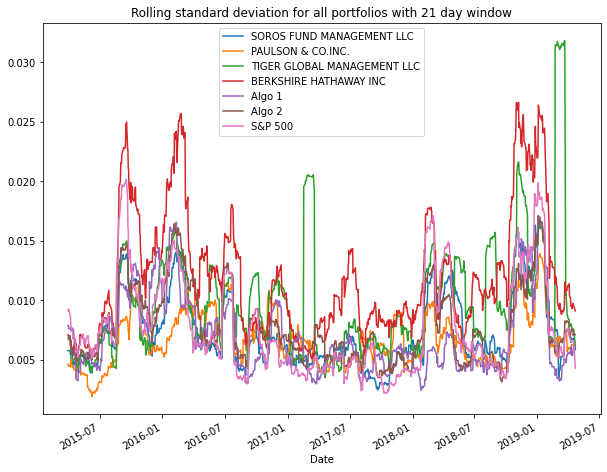

In [181]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Calculating the rolling standard deviation for all portfolios with 21 day window by using rolling function and passing window days as parameter and than calculate standard deviation for the return values.
protfoliosreturns_std=protfoliosreturns.rolling(window=21).std()
# Plot the rolling standard deviation
protfoliosreturns_std.plot(figsize=(10,8),title="Rolling standard deviation for all portfolios with 21 day window")

### Calculate and plot the correlation

In [182]:
# Calculate the correlation
# finding the correlation using corr function between portfolios.
protfoliosreturns_co = protfoliosreturns.corr()
# Display de correlation matrix
protfoliosreturns_co.style.background_gradient(cmap='coolwarm', axis=None)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta between algo and S&P 500'}, xlabel='Date'>

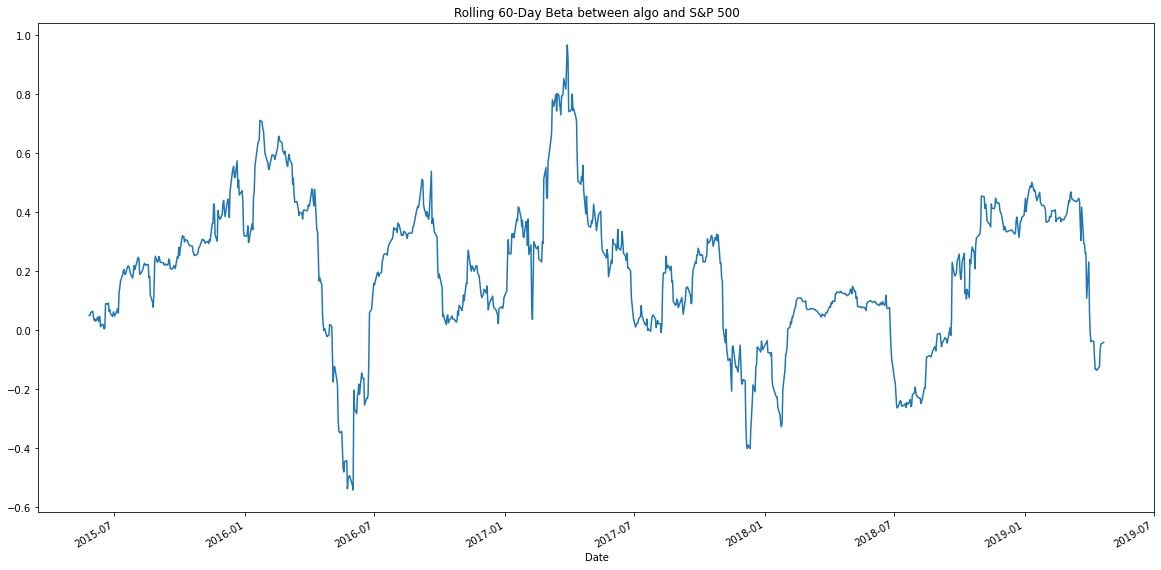

In [183]:
# Calculate covariance of a single portfolio
# Finding the covariance of the algorithmic returns.
covariance = protfoliosreturns['Algo 1'].rolling(60).cov(protfoliosreturns['Algo 2'])
# Calculate variance of S&P 500
variance = protfoliosreturns['S&P 500'].rolling(60).var()
# Computing beta
# Finding the beta using covariance get from algorithmic returns and dividing it by variance getting from S&P 500.
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta between algo and S&P 500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [184]:
# Use `ewm` to calculate the rolling window
protfoliosreturns.ewm(span=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000565,-0.000674,-0.001563,-0.000921,-0.005424,0.000813,0.001473
2015-03-05,0.001827,0.001063,-0.000131,0.001874,-0.003790,0.002096,0.006191
2015-03-06,-0.000964,-0.000267,-0.002526,-0.002420,-0.004125,-0.001791,0.003288
2015-03-09,-0.000593,0.000810,-0.000519,-0.002236,-0.004442,-0.001049,0.006638
...,...,...,...,...,...,...,...
2019-04-15,0.001953,0.000529,0.000877,0.001321,0.000708,0.001108,-0.001515
2019-04-16,0.002021,0.000516,0.000721,0.001277,0.000012,0.001271,-0.001170
2019-04-17,0.001574,-0.000119,0.000255,0.001454,-0.000926,0.000680,-0.001207


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [185]:
# Annualized Sharpe Ratios
# Finding sharp ration from daily return by find mean of all portfolios daily returns and dividing it by standard deviation of all portfolios daily returns
sharpratio = protfoliosreturns.mean()/std_all
# Finfing annual sharp ration since we calculated it from daily values. There are 252 trading days in the year, so the simple way to annualize it is to multiply the Sharpe ratio by the square root of 252.
annual_sharpratio = (252**0.5)*sharpratio

<AxesSubplot:title={'center':'Sharp Ratio'}>

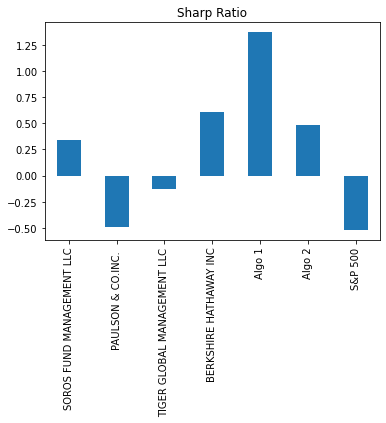

In [186]:
# Visualize the sharpe ratios as a bar plot
annual_sharpratio.plot.bar(title='Sharp Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [187]:
# Reading data from 1st stock
# Rading the goog_historical dataset using the pandas built in function read_csv and converting the Trade DATE column into datetime format.
df_firststock = pd.read_csv('Resources/goog_historical.csv',index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)


In [188]:
# Reading data from 2nd stock
# Rading the aapl_historical dataset using the pandas built in function read_csv and converting the Trade DATE column into datetime format.
df_secondstock = pd.read_csv('Resources/aapl_historical.csv',index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [189]:
# Reading data from 3rd stock
# Rading the cost_historical dataset using the pandas built in function read_csv and converting the Trade DATE column into datetime format.
df_thirdstock = pd.read_csv('Resources/cost_historical.csv',index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [190]:
# Combine all stocks in a single DataFrame
# # Using the concat function to combine the DataFrames by columns.
combined_df = pd.concat([df_firststock,df_secondstock,df_thirdstock], axis="columns")

In [191]:
# Reset Date index
combined_df.reset_index()

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
1,2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2,2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
3,2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
4,2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...,...
245,2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
246,2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
247,2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
248,2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88


In [192]:
# Reorganize portfolio data by having a column per symbol
combined_df.reset_index(drop=True)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,GOOG,1162.38,AAPL,200.72,COST,243.47
1,GOOG,1166.27,AAPL,202.90,COST,241.34
2,GOOG,1174.10,AAPL,202.86,COST,240.18
3,GOOG,1189.39,AAPL,208.48,COST,244.23
4,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
245,GOOG,1078.59,AAPL,186.99,COST,199.60
246,GOOG,1081.77,AAPL,188.18,COST,198.71
247,GOOG,1079.23,AAPL,186.44,COST,195.48
248,GOOG,1100.20,AAPL,188.15,COST,195.88


In [193]:
# Calculate daily returns
# Converting the type of columns named with NOCP into float.
combined_df['NOCP'] = combined_df['NOCP'].astype({'NOCP':float})
# Calculating the daily return of the portfolios..
combined_df['NOCP'] = combined_df['NOCP'].pct_change()
# Drop NAs
# Droping the rows having values as NAs using dropna function.
combined_df=combined_df.dropna()
# Display sample data
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-08,GOOG,0.003347,AAPL,0.010861,COST,-0.008749
2019-05-07,GOOG,0.006714,AAPL,-0.000197,COST,-0.004806
2019-05-06,GOOG,0.013023,AAPL,0.027704,COST,0.016862
2019-05-03,GOOG,-0.003355,AAPL,0.015685,COST,0.001597
2019-05-02,GOOG,-0.019226,AAPL,-0.012279,COST,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [194]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
#Using the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
daily_returns_portfolio= combined_df['NOCP'].dot(weights)
# Display sample data
daily_returns_portfolio.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [195]:
# Join your returns DataFrame to the original returns DataFrame
df_join = pd.concat([combined_df,daily_returns_portfolio],axis="columns")
df_join.rename(columns={0: 'Returns'},inplace=True)

In [196]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Droping rows with NaNs.
df_join.dropna()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP,Returns
Trade DATE,,,,,,,
2019-05-08,GOOG,0.003347,AAPL,0.010861,COST,-0.008749,0.001820
2019-05-07,GOOG,0.006714,AAPL,-0.000197,COST,-0.004806,0.000570
2019-05-06,GOOG,0.013023,AAPL,0.027704,COST,0.016862,0.019196
2019-05-03,GOOG,-0.003355,AAPL,0.015685,COST,0.001597,0.004642
2019-05-02,GOOG,-0.019226,AAPL,-0.012279,COST,-0.007890,-0.013131
...,...,...,...,...,...,...,...
2018-05-17,GOOG,0.011469,AAPL,0.003650,COST,0.003217,0.006112
2018-05-16,GOOG,0.002948,AAPL,0.006364,COST,-0.004459,0.001618
2018-05-15,GOOG,-0.002348,AAPL,-0.009246,COST,-0.016255,-0.009283


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [197]:
# Calculate the annualized `std`
# Calculating the annualized standard deviation by grouping the portfolio return of each portfolio by year and calculating ther standart deviation. 
df_join.groupby(df_join.index.year).std()

,NOCP,NOCP,NOCP,Returns
Trade DATE,,,,
2018,0.017105,0.018645,0.014891,0.013942
2019,0.016021,0.019282,0.010251,0.012161


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standart Deviation with 21 day window'}, xlabel='Trade DATE'>

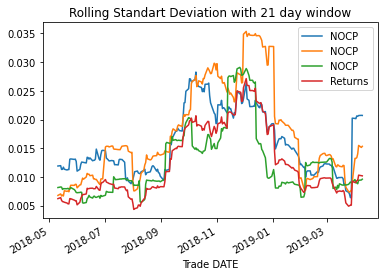

In [198]:
# Calculate rolling standard deviation
# Calculating the rolling standard deviation for all portfolios with 21 day window by using rolling function and passing window days as parameter and than calculate standard deviation for the return values.
rolling_std = df_join.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(title="Rolling Standart Deviation with 21 day window")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation plot'}>

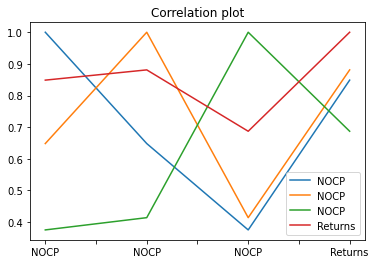

In [199]:
# Calculate and plot the correlation
# finding the correlation using corr function between portfolios.
protfoliosdailyreturns_co = df_join.corr()
protfoliosdailyreturns_co.plot(title="Correlation plot")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta between our Portfolio and S&P 500'}>

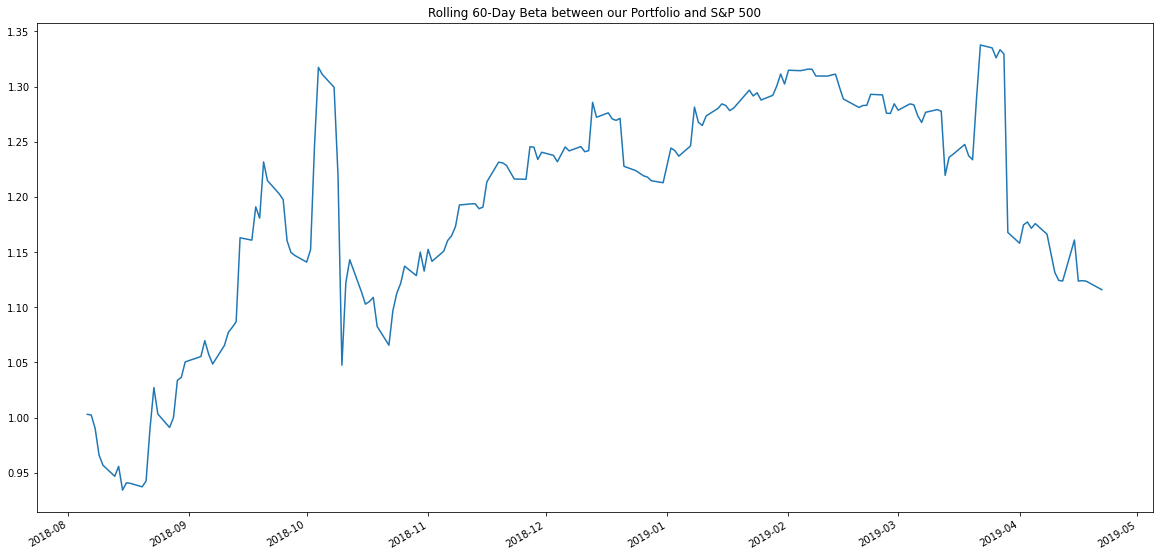

In [200]:
# Calculate and plot Beta
# Finding covariance between our portfolio and S&P 500.
covariance = daily_returns_portfolio.rolling(60).cov(protfoliosreturns['S&P 500'])
# Calculate variance of S&P 500
variance = protfoliosreturns['S&P 500'].rolling(60).var()
# Finding the beta using covariance get from comparing our portfolio ans S&P 500 and dividing it by variance getting from S&P 500.
# Computing beta
# Finding the beta using covariance get from comparing our portfolio ans S&P 500 and dividing it by variance getting from S&P 500.
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta between our Portfolio and S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [201]:
# Calculate Annualzied Sharpe Ratios
# Finding sharp ration from daily return by find mean of all portfolios daily returns and dividing it by standard deviation of all portfolios daily returns
sharpratio_custom = df_join.mean()/df_join.std()
# Finfing annual sharp ration since we calculated it from daily values. There are 252 trading days in the year, so the simple way to annualize it is to multiply the Sharpe ratio by the square root of 252.
annual_sharpratio_custom = (252**0.5)*sharpratio_custom

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12532/1200631453.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sharpratio_custom = df_join.mean()/df_join.std()


<AxesSubplot:title={'center':'Sharp ratio custom portfolio.'}>

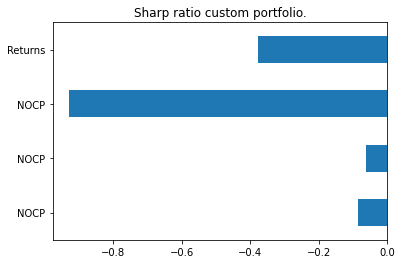

In [202]:
# Visualize the sharpe ratios as a bar plot
annual_sharpratio_custom.plot.barh(x='NOCP',title='Sharp ratio custom portfolio.')

### How does your portfolio do?

Write your answer here!

We found out the Sharpe ratio for our portfolio, and through bar chart we can see that the value we got for our custom portfolio is negative value that is (-0.1). As per the sharpe ratio, the performance of the portfolio is below the risk-free rate.